In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Load Dataset
Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
dataset = pd.read_csv("Processed_dataset.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

### Normalization (if needed)

In [4]:
scaler = MinMaxScaler()

In [5]:
normalized_dataset = scaler.fit_transform(dataset)

In [6]:
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns)

In [7]:
normalized_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### PCA (Principal Component Analysis)

#### 2 Dim PCA

In [8]:
pca = PCA(n_components=2)
dataset_2dim = pca.fit_transform(dataset)
print(f"Original shape: {dataset.shape}")
print(f"PCA transformed shape: {dataset_2dim.shape}")

Original shape: (7032, 41)
PCA transformed shape: (7032, 2)


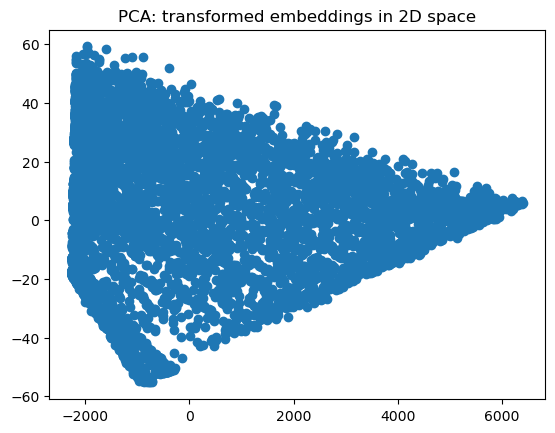

In [9]:
plt.scatter(dataset_2dim[:, 0], dataset_2dim[:, 1])
plt.title("PCA: transformed embeddings in 2D space")
plt.show()

#### 3 Dim PCA

In [10]:
pca = PCA(n_components=3)
dataset_3dim = pca.fit_transform(dataset)
print(f"Original shape: {dataset.shape}")
print(f"PCA transformed shape: {dataset_2dim.shape}")

Original shape: (7032, 41)
PCA transformed shape: (7032, 2)


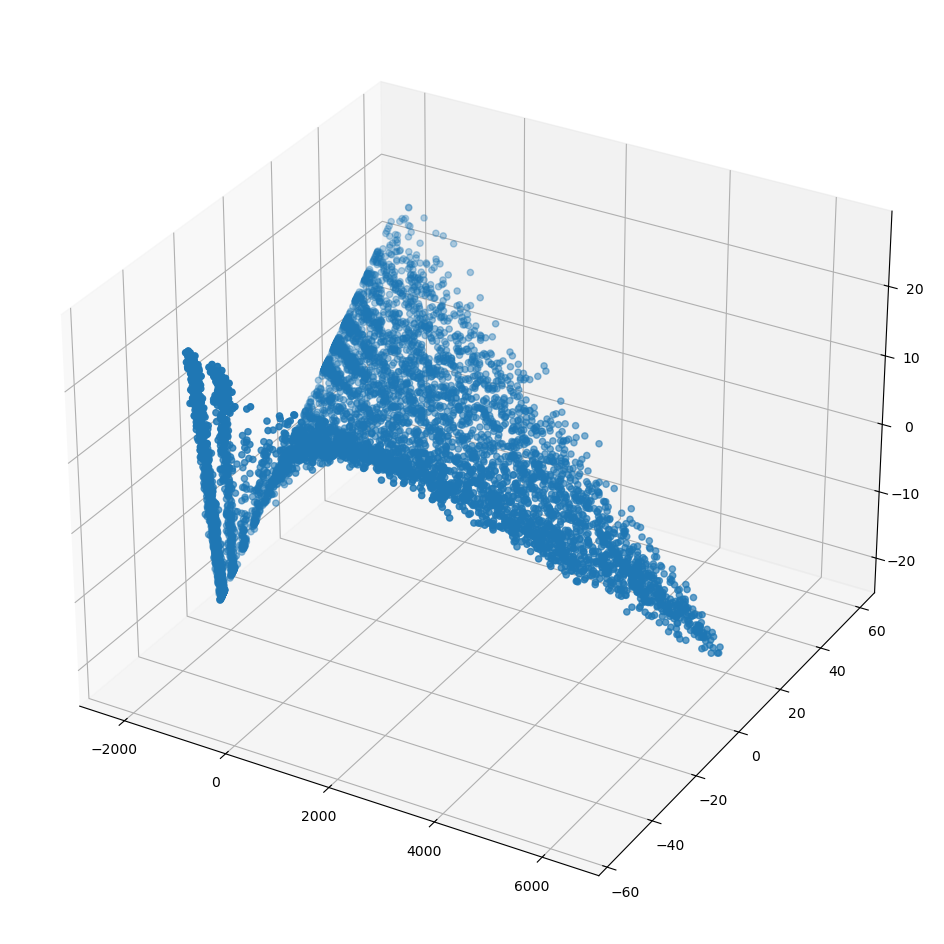

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset_3dim[:,0], dataset_3dim[:,1], dataset_3dim[:,2])
plt.show()

### t-SNE

#### 2 Dim t-SNE

In [12]:
TSNE_2d = TSNE(n_components=2).fit_transform(dataset)

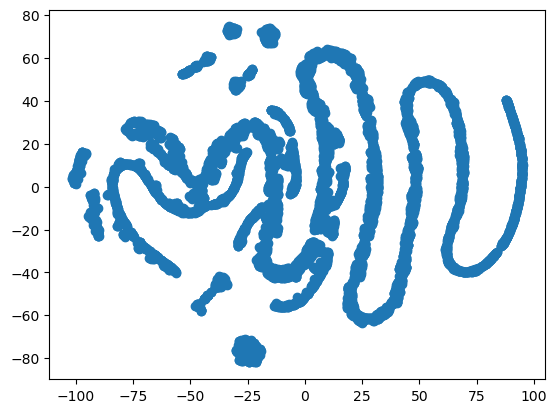

In [13]:
plt.scatter(TSNE_2d[:,0], TSNE_2d[:,1])

#### 3 Dim t-SNE

In [14]:
TSNE_3d = TSNE(n_components=3).fit_transform(dataset)

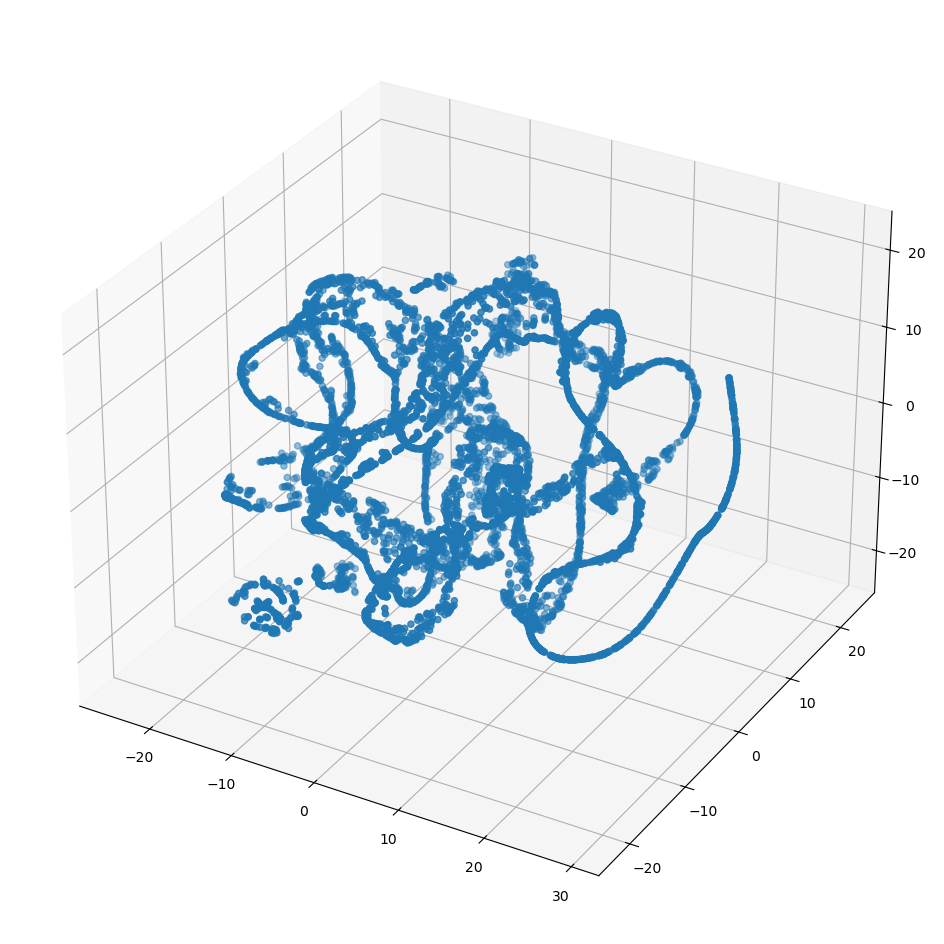

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(TSNE_3d[:,0], TSNE_3d[:,1], TSNE_3d[:,2])
plt.show()

### Apply HDBSCAN to Dataset

In [16]:
hdb = HDBSCAN(min_cluster_size=20).fit(dataset)

In [17]:
hdb.labels_

array([-1, -1, 47, ..., -1, 39,  5], dtype=int64)

In [18]:
cluster_sizes = list(range(4,41,2))

In [21]:
unique, counts = np.unique(hdb.labels_,return_counts=True)
frequency = dict(zip(unique, counts))

In [22]:
num_of_clusters = []
num_of_outliers = []
for size in cluster_sizes:
    hdb = HDBSCAN(min_cluster_size=size)
    hdb.fit(dataset)
    unique, counts = np.unique(hdb.labels_,return_counts=True)
    frequency = dict(zip(unique, counts))
    num_of_clusters.append(len(frequency)-1)
    num_of_outliers.append(frequency.get(-1))

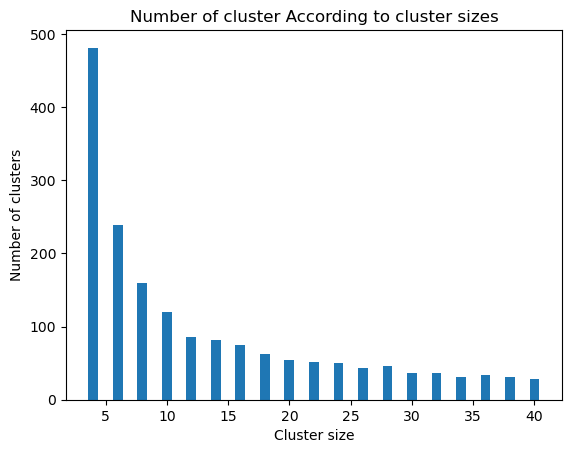

In [23]:
plt.bar(cluster_sizes,num_of_clusters)
plt.title("Number of cluster According to cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Number of clusters")
plt.show()

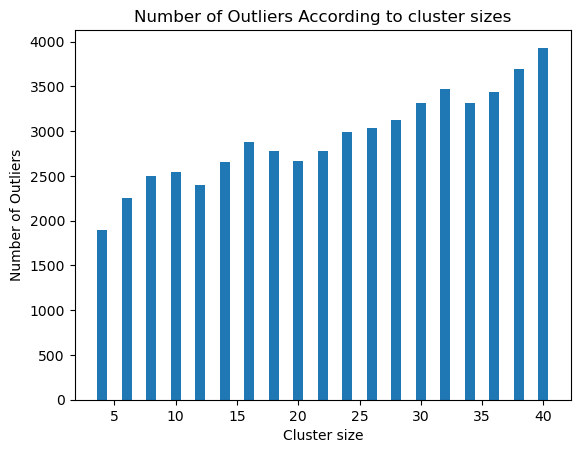

In [24]:
plt.bar(cluster_sizes,num_of_outliers)
plt.title("Number of Outliers According to cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Number of Outliers")
plt.show()

[Text(0.5, 1.0, 'HDBSCAN t-SNE Visualization')]

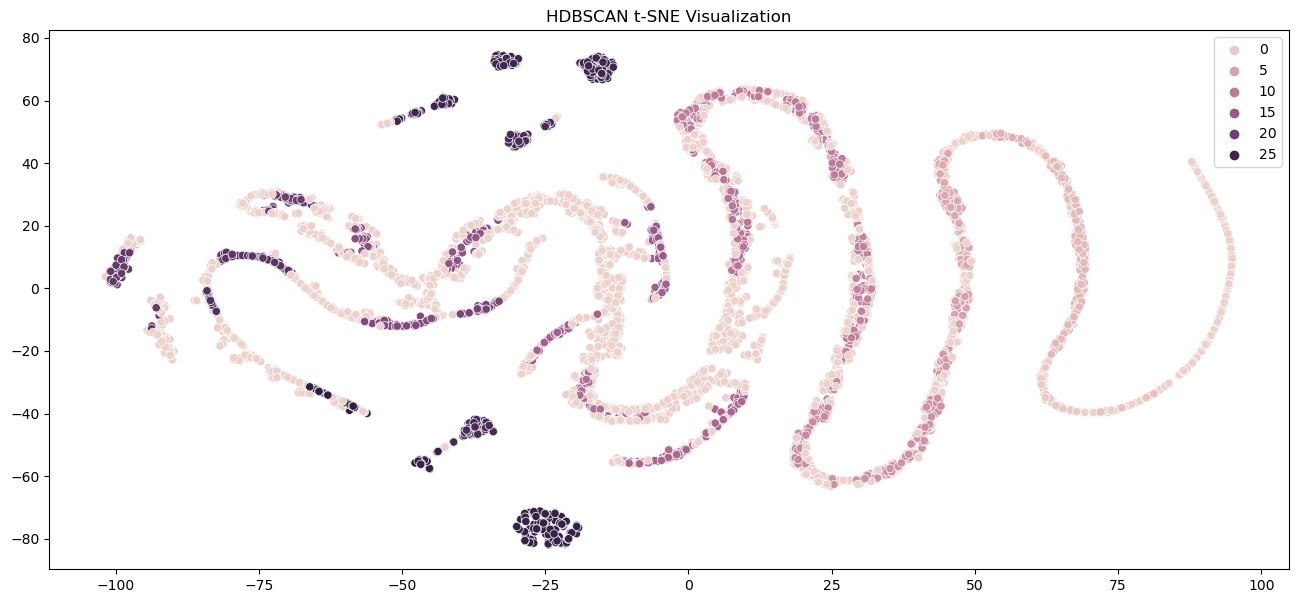

In [43]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=TSNE_2d[:,0],y=TSNE_2d[:,1],hue=hdb.labels_).set(title='HDBSCAN t-SNE Visualization')

### DBSCAN

#### Aplly DBSCAN to Dataset

In [81]:
clustering = DBSCAN(eps=20, min_samples=10).fit(dataset)

In [82]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56], dtype=int64)

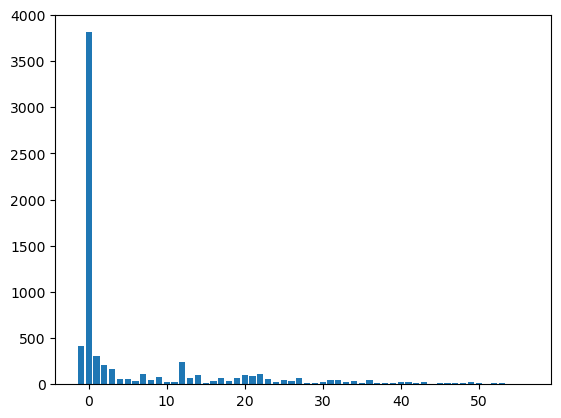

In [83]:
labels,counts = np.unique(clustering.labels_,return_counts=True)
x = labels
y = counts

plt.bar(x,y)
plt.show()

<Axes: >

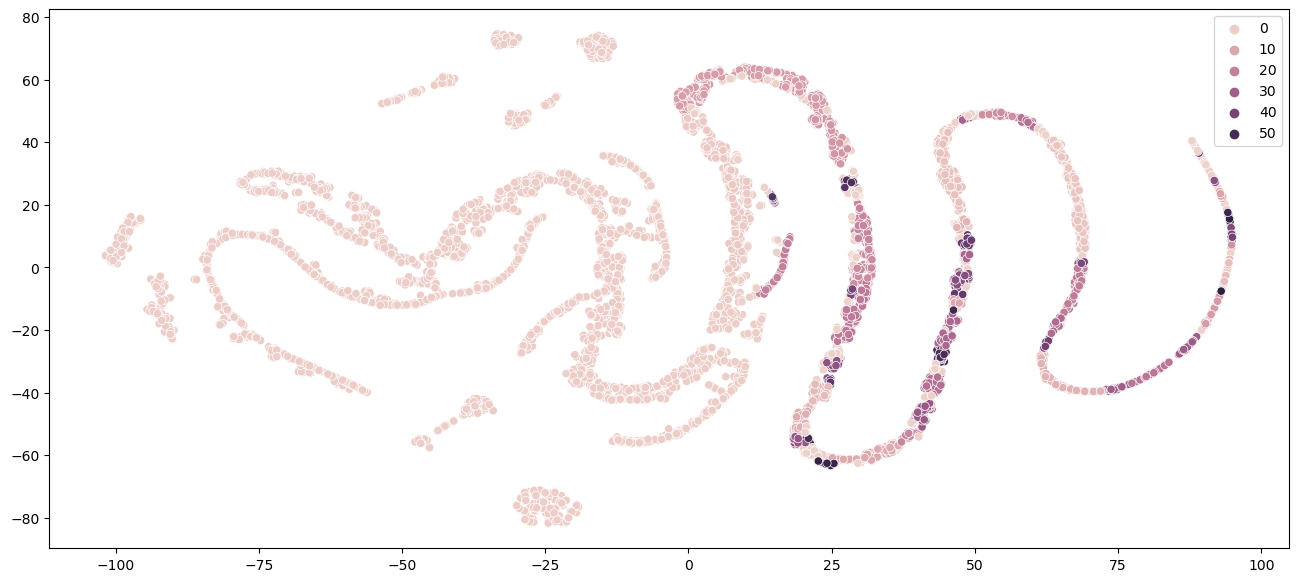

In [84]:
plt.figure(figsize=(16,7)),
sns.scatterplot(x=TSNE_2d[:,0],y=TSNE_2d[:,1],hue=clustering.labels_)